In [11]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [6]:
some_digit = X_train.iloc[0]  # Get the first digit from the training set

In [4]:
y_train_large = (y_train >= 7)  # True for "large" digits (7, 8, 9)
y_train_odd = (y_train % 2 == 1)  # True for "odd" digits (1, 3, 5, 7, 9)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [5]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [7]:
knn_clf.predict([some_digit])

C:\Users\Tymur_Hilfatullin\Projects\ML\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

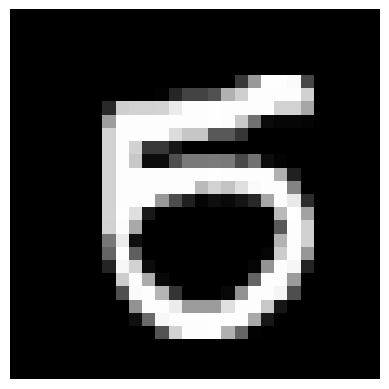

In [10]:
plt.imshow(some_digit.values.reshape(28, 28), cmap='gray', interpolation='nearest')
plt.axis('off')
plt.show()
# 6 is small and odd => [False, True]

In [12]:
y_train_knn_pred = cross_val_predict(
    knn_clf, X_train, y_multilabel, cv=3
)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9762500417941163